# [OSMsc](https://github.com/ruirzma/osmsc) city objects

Author: [Rui Ma](https://github.com/ruirzma)

This notebook shows how OSMsc constructs city objects.

In [35]:
import osmsc as oc
import osmnx as ox
import numpy as np

In [2]:
# import osmsc as oc
oc.__version__

'0.1'

In [ ]:
cityName = "Paris"
bbox_Paris = (48.8695, 2.3908, 48.8825, 2.4108)

## Building

In [12]:
BG = oc.building_group(bbox= bbox_Paris)
building_gdf = BG.get_gdf(tags=True, building_levels=False)
building_gdf_prj = ox.project_gdf(building_gdf)

In [14]:
building_gdf_prj.head()

,osmid,geometry,tags,osmscID,Building_area,Building_perimeter
0,63212010,"POLYGON ((455776.771 5414549.319, 455771.794 5...","{'building': 'yes', 'building:levels': '9', 's...",Building_63212010,425.941590,126.101343
1,63212012,"POLYGON ((455632.293 5414277.024, 455621.889 5...","{'building': 'house', 'source': 'cadastre-dgi-...",Building_63212012,42.765888,29.051447
2,63212018,"POLYGON ((455390.986 5414368.363, 455389.504 5...","{'building': 'yes', 'building:levels': '1', 's...",Building_63212018,58.690170,33.174859
3,63212023,"POLYGON ((455369.754 5414442.749, 455370.743 5...","{'building': 'yes', 'source': 'cadastre-dgi-fr...",Building_63212023,81.502088,43.837655
4,63212025,"POLYGON ((455963.481 5413952.865, 455961.928 5...","{'building': 'yes', 'building:levels': '4', 's...",Building_63212025,47.378189,27.752066


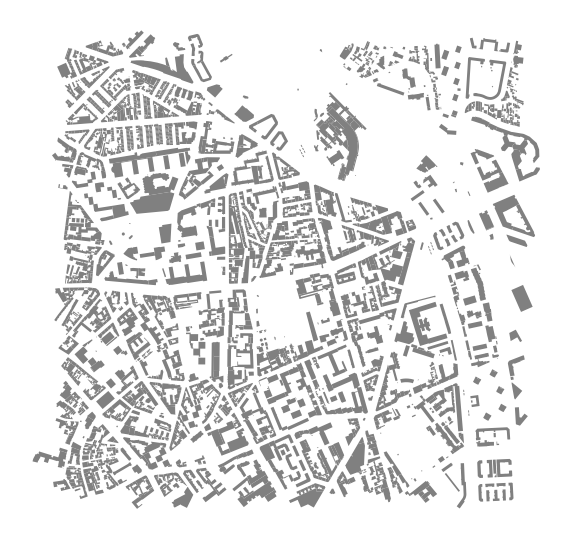

In [17]:
ax = building_gdf_prj.plot(figsize=(10,10), color='grey')
ax.set_axis_off()

### download buildings with buidling levels

In [15]:
BG = oc.building_group(bbox = bbox_Paris)
building_gdf = BG.get_gdf(tags=True, building_levels=True)
building_gdf_prj = ox.project_gdf(building_gdf)

In [16]:
building_gdf_prj.head()

,osmid,geometry,tags,building_levels,osmscID,Building_area,Building_perimeter
0,63212010,"POLYGON ((455776.771 5414549.319, 455771.794 5...","{'building': 'yes', 'building:levels': '9', 's...",9.0,Building_63212010,425.941590,126.101343
1,63212012,"POLYGON ((455632.293 5414277.024, 455621.889 5...","{'building': 'house', 'source': 'cadastre-dgi-...",NaN,Building_63212012,42.765888,29.051447
2,63212018,"POLYGON ((455390.986 5414368.363, 455389.504 5...","{'building': 'yes', 'building:levels': '1', 's...",1.0,Building_63212018,58.690170,33.174859
3,63212023,"POLYGON ((455369.754 5414442.749, 455370.743 5...","{'building': 'yes', 'source': 'cadastre-dgi-fr...",NaN,Building_63212023,81.502088,43.837655
4,63212025,"POLYGON ((455963.481 5413952.865, 455961.928 5...","{'building': 'yes', 'building:levels': '4', 's...",4.0,Building_63212025,47.378189,27.752066


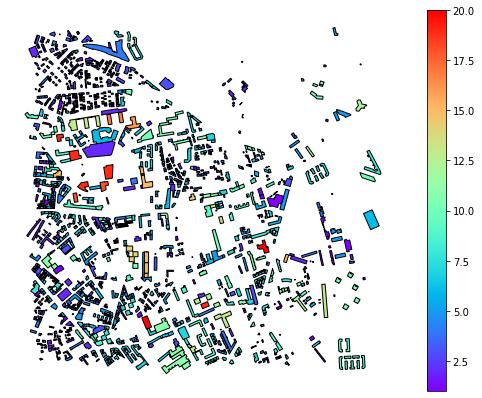

In [22]:
ax = building_gdf_prj.plot(figsize=(10, 7), edgecolor='k',linewidth=1, column="building_levels",cmap='rainbow',legend= True)
ax.set_axis_off()

## Vegetation

In [23]:
VG = oc.vegetation_group(bbox = bbox_Paris)

vegetation_gdf = VG.get_gdf()
vegetation_gdf_prj = ox.project_gdf(vegetation_gdf)

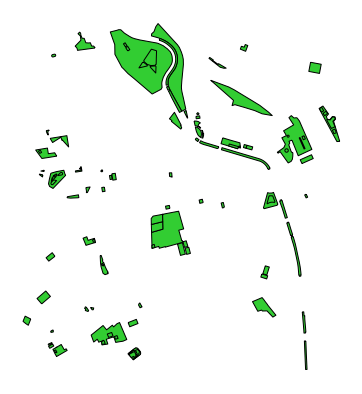

In [24]:
ax = vegetation_gdf_prj.plot(figsize=(10, 7), edgecolor='k',linewidth=1,  color = "limegreen")
ax.set_axis_off()

## Waterbody

In [25]:
WG = oc.waterbody_group(bbox = bbox_Paris)

waterbody_gdf = WG.get_gdf()
waterbody_gdf_prj = ox.project_gdf(waterbody_gdf)

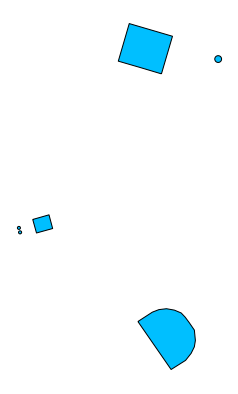

In [26]:
ax = waterbody_gdf_prj.plot(figsize=(10, 7), edgecolor='k',linewidth=1,  color = "deepskyblue")
ax.set_axis_off()

## Transportation

In [28]:
SG = oc.transportation_group( bbox = bbox_Paris, trans_type= ['primary','secondary', 'tertiary','residential','motorway','motorway_link'])
street_gdf_prj = SG.get_gdf_prj()

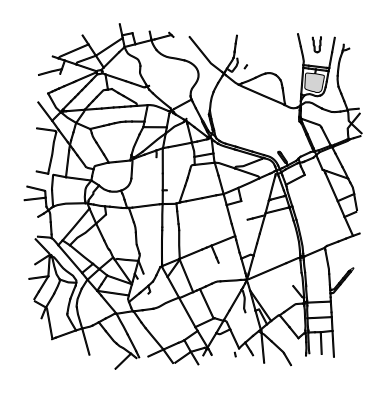

In [29]:
ax = street_gdf_prj.plot(figsize=(10, 7), edgecolor='k',linewidth=1,  facecolor = "lightgray")
ax.set_axis_off()

## Urban Patch

In [30]:
UG = oc.urban_patch_group(bbox= bbox_Paris, trans_type= ['primary','secondary', 'tertiary','residential','motorway','motorway_link'])
urban_patch_gdf_prj = UG.get_gdf_prj()

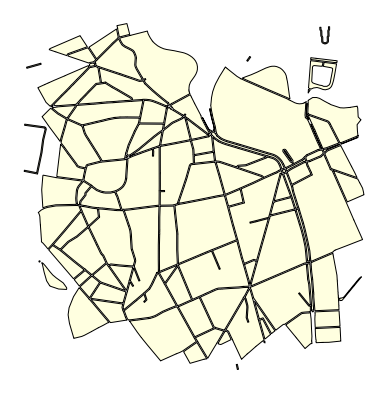

In [31]:
ax = urban_patch_gdf_prj.plot(figsize=(10, 7), edgecolor='k',linewidth=1,  facecolor = "lightyellow")
ax.set_axis_off()

## All OSMsc city objects

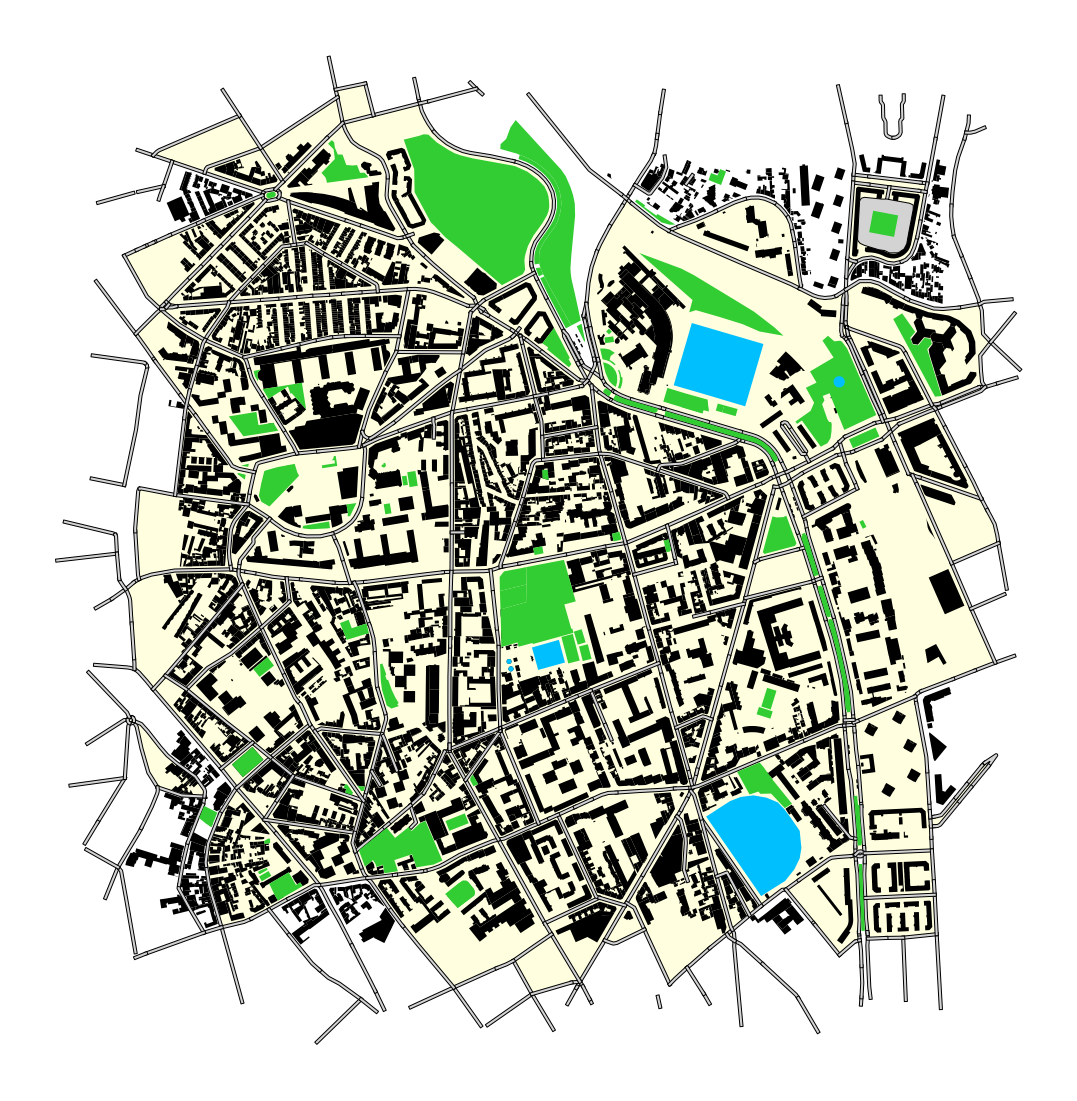

In [33]:
ax = urban_patch_gdf_prj.plot(figsize=(20, 20), edgecolor='white',linewidth=0.5, facecolor = "lightyellow")
building_gdf_prj.plot(ax=ax , color='k')
street_gdf_prj.plot(ax=ax, edgecolor='k',linewidth=1, facecolor = "lightgray")
vegetation_gdf_prj.plot(ax=ax , color = "limegreen")
waterbody_gdf_prj.plot(ax=ax , color = "deepskyblue")
ax.set_axis_off()